## Semester 1 Project Submission

Please fill out:
* Student name: Uma Sethuraman
* Instructor name: JP Ventura, Julian Ward


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import numpy as np
import zipfile
import sqlite3
import pandas as pd
%matplotlib inline

In [2]:
movie3 = pd.read_csv("zippedData/bom.movie_gross.csv.gz")
movie3 = movie3.rename(columns={'title':"movie"})
movie3['movie'] = movie3['movie'].map(lambda x: "Harry Potter and the Deathly Hallows: Part 1" if x == "Harry Potter and the Deathly Hallows Part 1" else x)
movie3.head()

,movie,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows: Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:
#pulling in movie budgets dataset and preparing it for joining by changing object types to int. 

In [4]:
moviebudgets = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")
moviebudgets["production_budget"] = moviebudgets['production_budget'].map(lambda x: x.strip("$"))
moviebudgets["production_budget"] = moviebudgets['production_budget'].map(lambda x: x.replace(",", ""))

moviebudgets["domestic_gross"] = moviebudgets['domestic_gross'].map(lambda x: x.strip("$"))
moviebudgets["domestic_gross"] = moviebudgets['domestic_gross'].map(lambda x: x.replace(",",""))

moviebudgets["worldwide_gross"] = moviebudgets['worldwide_gross'].map(lambda x: x.strip("$"))
moviebudgets["worldwide_gross"] = moviebudgets['worldwide_gross'].map(lambda x: x.replace(",",""))


moviebudgets= moviebudgets.astype({'production_budget': np.int64, 'domestic_gross': np.int64, 'worldwide_gross': np.int64})
moviebudgets.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000,309420425,963420425
8,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209
9,10,"Nov 6, 2015",Spectre,300000000,200074175,879620923


In [5]:
#joining movie budgets dataset with bom movie gross so we can have the studio names

In [6]:
movie_total_gross = movie3.join(moviebudgets.set_index("movie"), on= ['movie'],rsuffix = "___")
movie_total_gross = movie_total_gross.set_index('id')
movie_total_gross

,movie,studio,domestic_gross,foreign_gross,year,release_date,production_budget,domestic_gross___,worldwide_gross
id,,,,,,,,,
47.0,Toy Story 3,BV,415000000.0,652000000,2010,"Jun 18, 2010",200000000.0,415004880.0,1.068880e+09
NaN,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,NaN,NaN,NaN,NaN
NaN,Harry Potter and the Deathly Hallows: Part 1,WB,296000000.0,664300000,2010,NaN,NaN,NaN,NaN
38.0,Inception,WB,292600000.0,535700000,2010,"Jul 16, 2010",160000000.0,292576195.0,8.355246e+08
27.0,Shrek Forever After,P/DW,238700000.0,513900000,2010,"May 21, 2010",165000000.0,238736787.0,7.562447e+08
...,...,...,...,...,...,...,...,...,...
NaN,The Quake,Magn.,6200.0,NaN,2018,NaN,NaN,NaN,NaN
NaN,Edward II (2018 re-release),FM,4800.0,NaN,2018,NaN,NaN,NaN,NaN
NaN,El Pacto,Sony,2500.0,NaN,2018,NaN,NaN,NaN,NaN


In [7]:
movie4 = pd.read_csv('zippedData/tmdb.movies.csv.gz')

In [8]:
movie4= movie4.rename(columns={'original_title':"movie"})
movie4 = movie4.set_index("movie")


In [9]:
#pullin in tmdb ratings so we have budget info and ratings 

In [10]:
movies_and_rating = movie_total_gross.join(movie4, on = 'movie', how = 'outer', lsuffix = '__')

In [11]:
movies_and_rating

,movie,studio,domestic_gross,foreign_gross,year,release_date__,production_budget,domestic_gross___,worldwide_gross,Unnamed: 0,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count
47.0,Toy Story 3,BV,415000000.0,652000000,2010.0,"Jun 18, 2010",200000000.0,415004880.0,1.068880e+09,7.0,"[16, 10751, 35]",10193.0,en,24.445,2010-06-17,Toy Story 3,7.7,8340.0
NaN,Alice in Wonderland (2010),BV,334200000.0,691300000,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,Harry Potter and the Deathly Hallows: Part 1,WB,296000000.0,664300000,2010.0,NaN,NaN,NaN,NaN,0.0,"[12, 14, 10751]",12444.0,en,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788.0
38.0,Inception,WB,292600000.0,535700000,2010.0,"Jul 16, 2010",160000000.0,292576195.0,8.355246e+08,4.0,"[28, 878, 12]",27205.0,en,27.920,2010-07-16,Inception,8.3,22186.0
27.0,Shrek Forever After,P/DW,238700000.0,513900000,2010.0,"May 21, 2010",165000000.0,238736787.0,7.562447e+08,38.0,"[35, 12, 14, 16, 10751]",10192.0,en,15.041,2010-05-16,Shrek Forever After,6.1,3843.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,Laboratory Conditions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26512.0,"[27, 18]",488143.0,en,0.600,2018-10-13,Laboratory Conditions,0.0,1.0
NaN,_EXHIBIT_84xxx_,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26513.0,"[18, 53]",485975.0,en,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1.0
NaN,The Last One,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26514.0,"[14, 28, 12]",381231.0,en,0.600,2018-10-01,The Last One,0.0,1.0
NaN,Trailer Made,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26515.0,"[10751, 12, 28]",366854.0,en,0.600,2018-06-22,Trailer Made,0.0,1.0


In [12]:
movies_and_rating.head()


,movie,studio,domestic_gross,foreign_gross,year,release_date__,production_budget,domestic_gross___,worldwide_gross,Unnamed: 0,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count
47.0,Toy Story 3,BV,415000000.0,652000000,2010.0,"Jun 18, 2010",200000000.0,415004880.0,1.068880e+09,7.0,"[16, 10751, 35]",10193.0,en,24.445,2010-06-17,Toy Story 3,7.7,8340.0
NaN,Alice in Wonderland (2010),BV,334200000.0,691300000,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,Harry Potter and the Deathly Hallows: Part 1,WB,296000000.0,664300000,2010.0,NaN,NaN,NaN,NaN,0.0,"[12, 14, 10751]",12444.0,en,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788.0
38.0,Inception,WB,292600000.0,535700000,2010.0,"Jul 16, 2010",160000000.0,292576195.0,8.355246e+08,4.0,"[28, 878, 12]",27205.0,en,27.920,2010-07-16,Inception,8.3,22186.0
27.0,Shrek Forever After,P/DW,238700000.0,513900000,2010.0,"May 21, 2010",165000000.0,238736787.0,7.562447e+08,38.0,"[35, 12, 14, 16, 10751]",10192.0,en,15.041,2010-05-16,Shrek Forever After,6.1,3843.0


In [13]:
#dropping unnecessary columns

In [14]:
movies_and_rating.drop(["Unnamed: 0",'id','title', 'genre_ids', 'title'],  axis=1, inplace=True)


In [15]:
movies_and_rating = movies_and_rating.set_index('movie')

In [16]:
movies_and_rating

,studio,domestic_gross,foreign_gross,year,release_date__,production_budget,domestic_gross___,worldwide_gross,original_language,popularity,release_date,vote_average,vote_count
movie,,,,,,,,,,,,,
Toy Story 3,BV,415000000.0,652000000,2010.0,"Jun 18, 2010",200000000.0,415004880.0,1.068880e+09,en,24.445,2010-06-17,7.7,8340.0
Alice in Wonderland (2010),BV,334200000.0,691300000,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Harry Potter and the Deathly Hallows: Part 1,WB,296000000.0,664300000,2010.0,NaN,NaN,NaN,NaN,en,33.533,2010-11-19,7.7,10788.0
Inception,WB,292600000.0,535700000,2010.0,"Jul 16, 2010",160000000.0,292576195.0,8.355246e+08,en,27.920,2010-07-16,8.3,22186.0
Shrek Forever After,P/DW,238700000.0,513900000,2010.0,"May 21, 2010",165000000.0,238736787.0,7.562447e+08,en,15.041,2010-05-16,6.1,3843.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Laboratory Conditions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en,0.600,2018-10-13,0.0,1.0
_EXHIBIT_84xxx_,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en,0.600,2018-05-01,0.0,1.0
The Last One,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en,0.600,2018-10-01,0.0,1.0


In [17]:
#dropping movies that don't have enough information to be of use

In [18]:
movies_and_rating.dropna(axis = 0, thresh = 6, inplace = True)





In [19]:
movies_and_rating

,studio,domestic_gross,foreign_gross,year,release_date__,production_budget,domestic_gross___,worldwide_gross,original_language,popularity,release_date,vote_average,vote_count
movie,,,,,,,,,,,,,
Toy Story 3,BV,415000000.0,652000000,2010.0,"Jun 18, 2010",200000000.0,415004880.0,1.068880e+09,en,24.445,2010-06-17,7.7,8340.0
Harry Potter and the Deathly Hallows: Part 1,WB,296000000.0,664300000,2010.0,NaN,NaN,NaN,NaN,en,33.533,2010-11-19,7.7,10788.0
Inception,WB,292600000.0,535700000,2010.0,"Jul 16, 2010",160000000.0,292576195.0,8.355246e+08,en,27.920,2010-07-16,8.3,22186.0
Shrek Forever After,P/DW,238700000.0,513900000,2010.0,"May 21, 2010",165000000.0,238736787.0,7.562447e+08,en,15.041,2010-05-16,6.1,3843.0
The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010.0,"Jun 30, 2010",68000000.0,300531751.0,7.061028e+08,en,20.340,2010-06-23,6.0,4909.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Loving Pablo,Uni.,22000.0,NaN,2018.0,NaN,NaN,NaN,NaN,es,12.937,2018-06-15,6.1,505.0
The Escape,IFC,14000.0,NaN,2018.0,NaN,NaN,NaN,NaN,en,0.600,2015-08-14,7.0,1.0
The Escape,IFC,14000.0,NaN,2018.0,NaN,NaN,NaN,NaN,en,1.176,2016-10-23,6.6,10.0


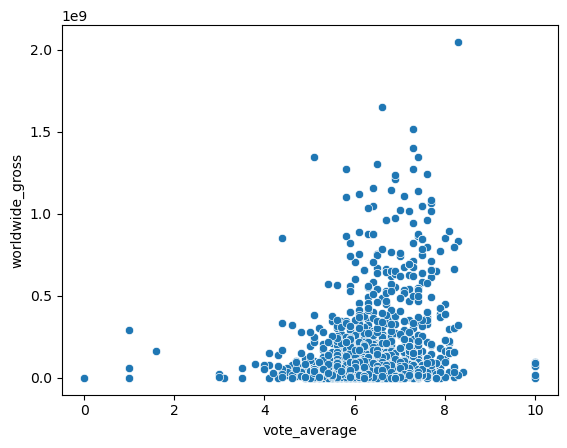

In [20]:
sns.scatterplot(x="vote_average",
y="worldwide_gross",
data=movies_and_rating);


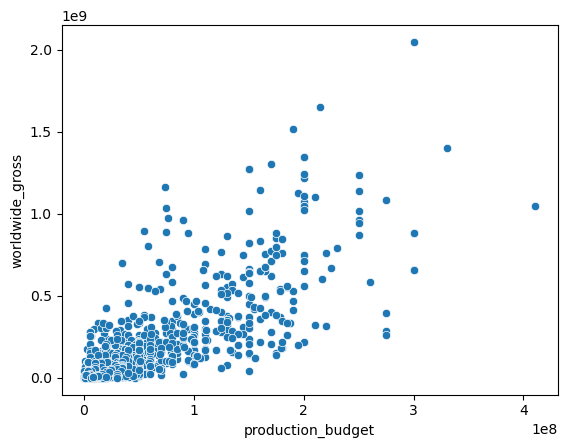

In [21]:
sns.scatterplot(x="production_budget",
y="worldwide_gross",
data=movies_and_rating);

In [22]:
top_10 = (movies_and_rating['studio'].value_counts()).iloc[:10]
top_10

Uni.     159
Fox      140
WB       128
IFC      124
BV       101
Par.      97
LGF       95
SPC       94
Sony      86
Magn.     86
Name: studio, dtype: int64

C:\Users\usethuraman\AppData\Local\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\usethuraman\AppData\Local\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\usethuraman\AppData\Local\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\usethuraman\AppData\Local\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\usethuraman\AppData\Local\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\usethuraman\AppData\Local\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f

C:\Users\usethuraman\AppData\Local\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\usethuraman\AppData\Local\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\usethuraman\AppData\Local\anaconda3\Lib\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
C:\Users\usethuraman\AppData\Local\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\usethuraman\AppData\Local\anaconda3\Lib\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
C:\Users\usethuraman\AppData\Local\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append

C:\Users\usethuraman\AppData\Local\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\usethuraman\AppData\Local\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\usethuraman\AppData\Local\anaconda3\Lib\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
C:\Users\usethuraman\AppData\Local\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\usethuraman\AppData\Local\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\usethuraman\AppData\Local\anaconda3\Lib\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  retur

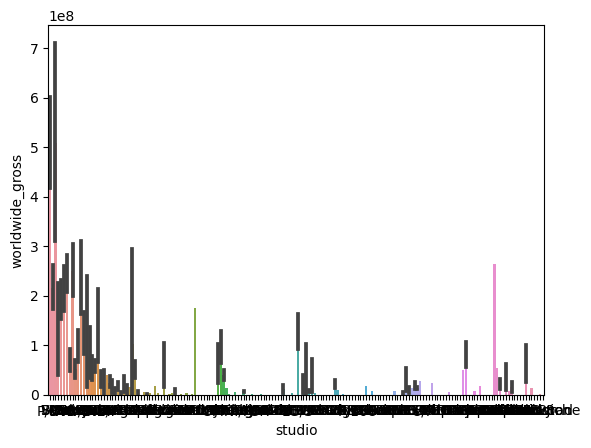

In [23]:
sns.barplot(x = "studio",
           y= "worldwide_gross",
           data = movies_and_rating);

In [24]:
# reading from IMDB database
with zipfile.ZipFile("zippedData/im.db.zip", 'r') as imdb_zip:
    imdb_zip.extractall("zippedData")
conn = sqlite3.connect('zippedData/im.db')
cur = conn.cursor()
cur.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")

In [25]:
# getting movie basics table
movie_basics = pd.DataFrame(
    data=cur.execute("""SELECT * FROM movie_basics;""").fetchall(),
    columns=[x[0] for x in cur.description]
)

In [26]:
# getting movie ratings table
movie_ratings = pd.DataFrame(
    data=cur.execute("""SELECT * FROM movie_ratings;""").fetchall(),
    columns=[x[0] for x in cur.description]
)

In [27]:
# merging movie basics and ratings
merged = pd.merge(movie_ratings, movie_basics, on='movie_id')
merged = merged.rename(columns={'primary_title':"movie"})
merged = merged.set_index('movie')
merged

,movie_id,averagerating,numvotes,original_title,start_year,runtime_minutes,genres
movie,,,,,,,
Laiye Je Yaarian,tt10356526,8.3,31,Laiye Je Yaarian,2019,117.0,Romance
Borderless,tt10384606,8.9,559,Borderless,2019,87.0,Documentary
Just Inès,tt1042974,6.4,20,Just Inès,2010,90.0,Drama
The Legend of Hercules,tt1043726,4.2,50352,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
Até Onde?,tt1060240,6.5,21,Até Onde?,2011,73.0,"Mystery,Thriller"
...,...,...,...,...,...,...,...
Caisa,tt9805820,8.1,25,Caisa,2018,84.0,Documentary
Code Geass: Lelouch of the Rebellion - Glorification,tt9844256,7.5,24,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi"
Sisters,tt9851050,4.7,14,Sisters,2019,NaN,"Action,Drama"


In [28]:
# combining master df with merged IMDB data
master_df = movie_total_gross.join(merged, on = 'movie', how = 'outer', lsuffix = '__')

In [29]:
master_df.dropna(axis = 0, thresh = 9, inplace = True)

In [30]:
master_df = master_df.set_index("movie")

In [31]:
master_df.drop(["domestic_gross___",'movie_id','original_title', 'start_year'],  axis=1, inplace=True)


In [32]:
master_df["Total_Profit"] = (master_df.worldwide_gross - master_df.production_budget)

In [33]:
messingaround = master_df.copy()

messingaround['genres'] = messingaround['genres'].map(lambda x: x if x is not str else x.split(','))
messingaround.head()


,studio,domestic_gross,foreign_gross,year,release_date,production_budget,worldwide_gross,averagerating,numvotes,runtime_minutes,genres,Total_Profit
movie,,,,,,,,,,,,
Toy Story 3,BV,415000000.0,652000000,2010.0,"Jun 18, 2010",200000000.0,1.068880e+09,8.3,682218.0,103.0,"Adventure,Animation,Comedy",868879522.0
Harry Potter and the Deathly Hallows: Part 1,WB,296000000.0,664300000,2010.0,NaN,NaN,NaN,7.7,425530.0,146.0,"Adventure,Fantasy,Mystery",NaN
Inception,WB,292600000.0,535700000,2010.0,"Jul 16, 2010",160000000.0,8.355246e+08,8.8,1841066.0,148.0,"Action,Adventure,Sci-Fi",675524642.0
Shrek Forever After,P/DW,238700000.0,513900000,2010.0,"May 21, 2010",165000000.0,7.562447e+08,6.3,167532.0,93.0,"Adventure,Animation,Comedy",591244673.0
The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010.0,"Jun 30, 2010",68000000.0,7.061028e+08,5.0,211733.0,124.0,"Adventure,Drama,Fantasy",638102828.0


In [34]:
master_df

,studio,domestic_gross,foreign_gross,year,release_date,production_budget,worldwide_gross,averagerating,numvotes,runtime_minutes,genres,Total_Profit
movie,,,,,,,,,,,,
Toy Story 3,BV,415000000.0,652000000,2010.0,"Jun 18, 2010",200000000.0,1.068880e+09,8.3,682218.0,103.0,"Adventure,Animation,Comedy",868879522.0
Harry Potter and the Deathly Hallows: Part 1,WB,296000000.0,664300000,2010.0,NaN,NaN,NaN,7.7,425530.0,146.0,"Adventure,Fantasy,Mystery",NaN
Inception,WB,292600000.0,535700000,2010.0,"Jul 16, 2010",160000000.0,8.355246e+08,8.8,1841066.0,148.0,"Action,Adventure,Sci-Fi",675524642.0
Shrek Forever After,P/DW,238700000.0,513900000,2010.0,"May 21, 2010",165000000.0,7.562447e+08,6.3,167532.0,93.0,"Adventure,Animation,Comedy",591244673.0
The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010.0,"Jun 30, 2010",68000000.0,7.061028e+08,5.0,211733.0,124.0,"Adventure,Drama,Fantasy",638102828.0
...,...,...,...,...,...,...,...,...,...,...,...,...
Souvenir,Strand,11400.0,NaN,2018.0,NaN,NaN,NaN,6.0,823.0,90.0,"Drama,Music,Romance",NaN
Souvenir,Strand,11400.0,NaN,2018.0,NaN,NaN,NaN,5.9,9.0,86.0,"Comedy,Romance",NaN
Beauty and the Dogs,Osci.,8900.0,NaN,2018.0,NaN,NaN,NaN,7.0,1016.0,100.0,"Crime,Drama,Thriller",NaN


In [35]:
master_df.dtypes

studio                object
domestic_gross       float64
foreign_gross         object
year                 float64
release_date          object
production_budget    float64
worldwide_gross      float64
averagerating        float64
numvotes             float64
runtime_minutes      float64
genres                object
Total_Profit         float64
dtype: object

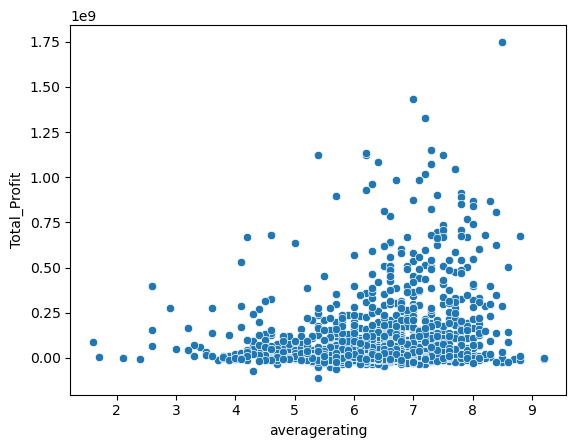

In [36]:
sns.scatterplot(x="averagerating",
y="Total_Profit",
data=master_df);

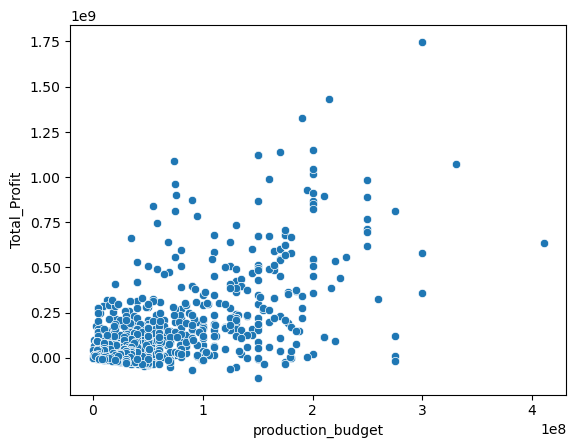

In [37]:
sns.scatterplot(x="production_budget",
y="Total_Profit",
data=master_df);

### Data Visualizations and Analysis for Movie Runtime

In [38]:
# Inserting profit percentage
master_df["Profit%"] = ((master_df.Total_Profit)/master_df.production_budget)*100

In [39]:
# creating runtime bins (common movie durations)
"""
Converting runtimes into runtime bins for common movie duration runtime intervals
"""
binned_df = master_df.copy()
bins = [90, 150, 210, 270] # bins of under 1.5 hours, 1.5-2.5 hours, 2.5-3.5 hours, 3.5+ hours
runtime_bins = []
for index, row in binned_df.iterrows():
    runtime = row['runtime_minutes']
    if runtime < bins[0]:
        runtime_bins.append(0)
    elif runtime < bins[1]:
        runtime_bins.append(1)
    elif runtime < bins[2]:
        runtime_bins.append(2)
    else:
        runtime_bins.append(3)
binned_df['runtime_bins'] = runtime_bins
binned_df[binned_df['runtime_bins'] == 0] # examples of runtimes under 1.5 hours

,studio,domestic_gross,foreign_gross,year,release_date,production_budget,worldwide_gross,averagerating,numvotes,runtime_minutes,genres,Total_Profit,Profit%,runtime_bins
movie,,,,,,,,,,,,,,
Gulliver's Travels,Fox,42800000.0,194600000,2010.0,"Dec 25, 2010",112000000.0,232017848.0,4.9,61178.0,85.0,"Adventure,Comedy,Family",120017848.0,107.158793,0
Yogi Bear,WB,100200000.0,101300000,2010.0,"Dec 17, 2010",80000000.0,204774690.0,4.6,18934.0,80.0,"Adventure,Animation,Comedy",124774690.0,155.968362,0
Unstoppable,Fox,81600000.0,86200000,2010.0,"Nov 12, 2010",95000000.0,165720921.0,4.3,551.0,65.0,Documentary,70720921.0,74.443075,0
Unstoppable,Fox,81600000.0,86200000,2010.0,"Nov 12, 2010",95000000.0,165720921.0,8.1,8.0,84.0,Documentary,70720921.0,74.443075,0
Date Night,Fox,98700000.0,53600000,2010.0,"Apr 9, 2010",55000000.0,152269033.0,6.3,144683.0,88.0,"Comedy,Crime,Romance",97269033.0,176.852787,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
In Between,FM,108000.0,NaN,2018.0,NaN,NaN,NaN,7.2,5.0,45.0,"Documentary,Drama,Romance",NaN,NaN,0
Just a Breath Away,EOne,78000.0,NaN,2018.0,NaN,NaN,NaN,5.9,3501.0,89.0,Sci-Fi,NaN,NaN,0
Under the Tree,Magn.,67600.0,NaN,2018.0,NaN,NaN,NaN,6.9,2486.0,89.0,"Comedy,Drama,Mystery",NaN,NaN,0


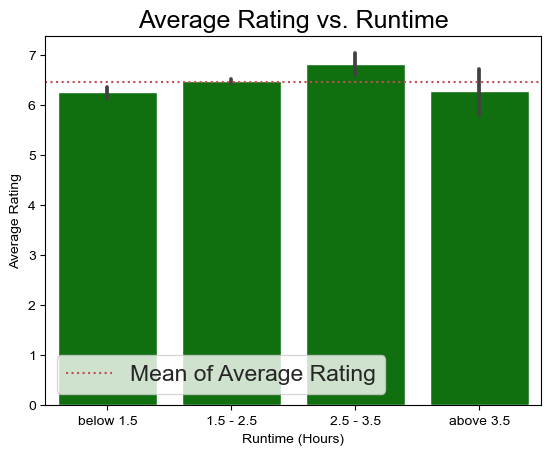

In [40]:
# Average rating vs. runtime
fix, ax = plt.subplots()
sns.set(rc={"figure.figsize":(10, 7)})
sns.set_theme(style="whitegrid", font_scale=1.5)
runtime_df = binned_df[binned_df['runtime_bins'] != 0]
plot = sns.barplot(data = binned_df, x = 'runtime_bins', y = 'averagerating',
                   color = 'green').set(title = 'Average Rating vs. Runtime')
ax.set_xticklabels(["below 1.5","1.5 - 2.5","2.5 - 3.5","above 3.5"])
ax.axhline(y = binned_df['averagerating'].mean(), color='r', 
               linestyle='dotted', label = "Mean of Average Rating")
ax.legend()
ax.set_xlabel("Runtime (Hours)")
ax.set_ylabel("Average Rating")
plt.show()

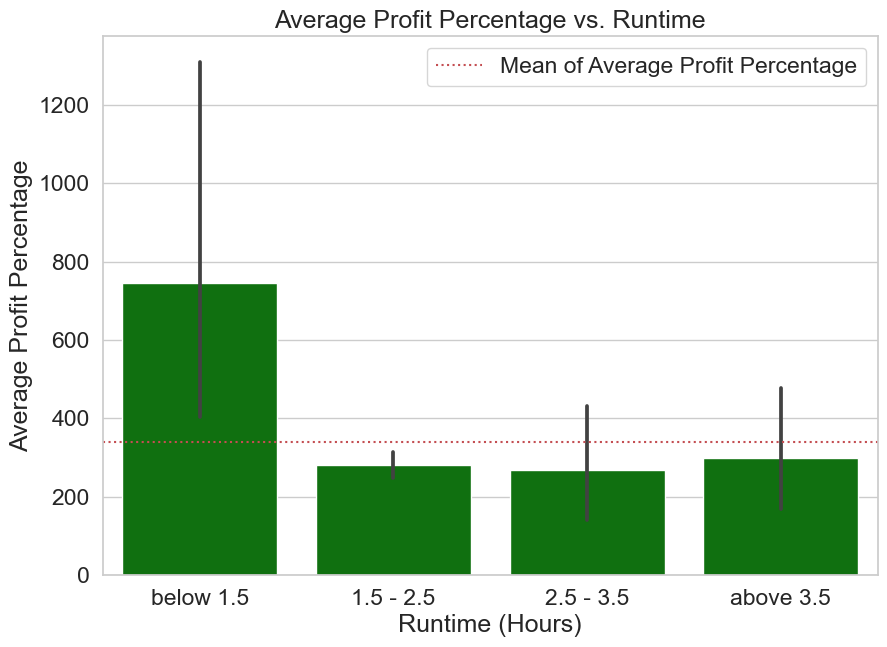

In [41]:
# Average profit percentage vs. runtime
fix, ax = plt.subplots()
sns.set(rc={"figure.figsize":(10, 7)})
sns.set_theme(style="whitegrid", font_scale=1.5)
plot = sns.barplot(data = binned_df, x = 'runtime_bins', y = 'Profit%',
                   color = 'green').set(title = 'Average Profit Percentage vs. Runtime')
ax.set_xticklabels(["below 1.5","1.5 - 2.5","2.5 - 3.5","above 3.5"])
ax.set_xlabel("Runtime (Hours)")
ax.set_ylabel("Average Profit Percentage")
ax.axhline(y = binned_df['Profit%'].mean(), color='r', linestyle='dotted', label = "Mean of Average Profit Percentage")
ax.legend()
plt.show()

(array([   6.,   18.,   32.,  109.,  204.,  603., 1063.,  737.,  247.,
          29.]),
 array([1.6 , 2.36, 3.12, 3.88, 4.64, 5.4 , 6.16, 6.92, 7.68, 8.44, 9.2 ]),
 <BarContainer object of 10 artists>)

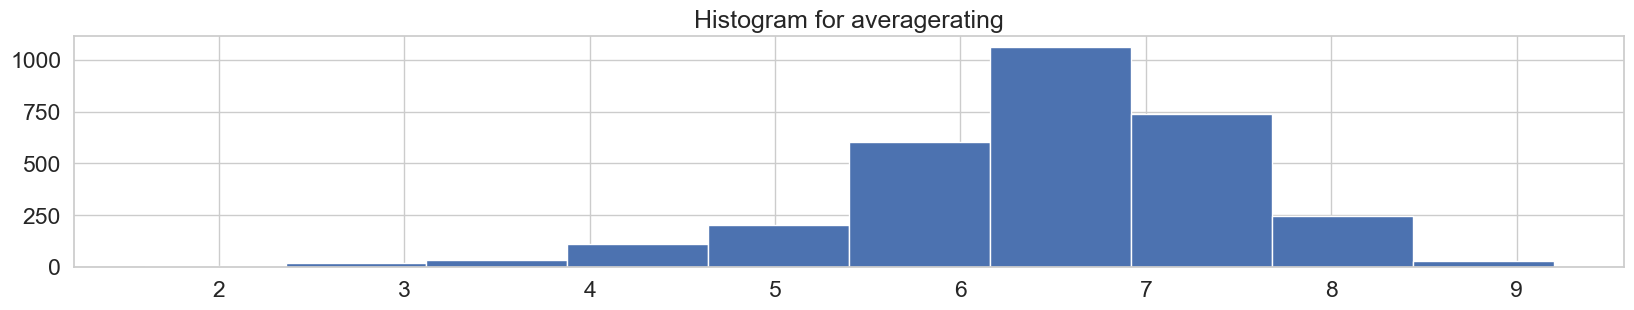

In [42]:
plt.rcParams["figure.figsize"] = (20,3)
plt.title("Histogram for averagerating")
plt.hist(data = master_df, x = 'averagerating')

[Text(0.5, 1.0, 'Runtime in Minutes by Average Rating')]

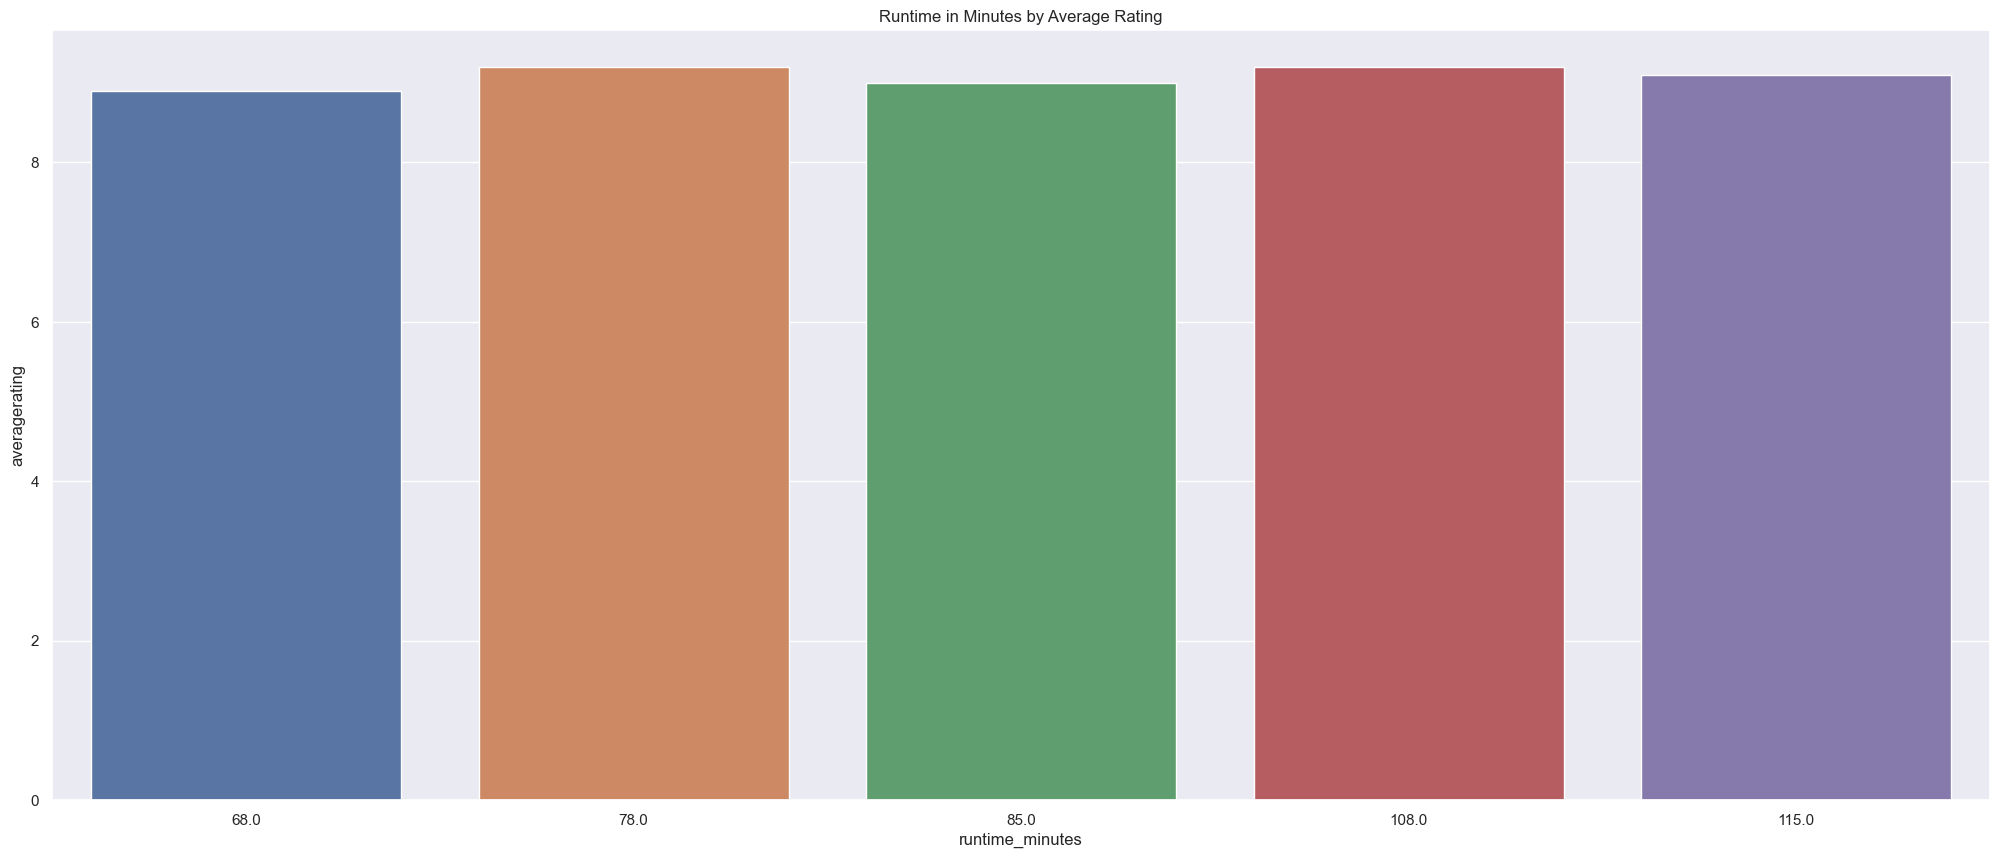

In [43]:
sns.set(rc={"figure.figsize":(25, 10)})
new_df = master_df.dropna(axis=0, subset=['runtime_minutes'])
new_df_top_5 = new_df.sort_values(['averagerating'], ascending = False).head(5)
new_df_top_5
sns.barplot(data = new_df_top_5, x = 'runtime_minutes', y = 'averagerating').set(title = 'Runtime in Minutes by Average Rating')

In [44]:
binned_df['runtime_bins'].value_counts()

1    2460
0     435
3     123
2     104
Name: runtime_bins, dtype: int64

In [45]:
binned_df['rating_bins'] = np.trunc((binned_df['averagerating']/1))
binned_df.head()

,studio,domestic_gross,foreign_gross,year,release_date,production_budget,worldwide_gross,averagerating,numvotes,runtime_minutes,genres,Total_Profit,Profit%,runtime_bins,rating_bins
movie,,,,,,,,,,,,,,,
Toy Story 3,BV,415000000.0,652000000,2010.0,"Jun 18, 2010",200000000.0,1.068880e+09,8.3,682218.0,103.0,"Adventure,Animation,Comedy",868879522.0,434.439761,1,8.0
Harry Potter and the Deathly Hallows: Part 1,WB,296000000.0,664300000,2010.0,NaN,NaN,NaN,7.7,425530.0,146.0,"Adventure,Fantasy,Mystery",NaN,NaN,1,7.0
Inception,WB,292600000.0,535700000,2010.0,"Jul 16, 2010",160000000.0,8.355246e+08,8.8,1841066.0,148.0,"Action,Adventure,Sci-Fi",675524642.0,422.202901,1,8.0
Shrek Forever After,P/DW,238700000.0,513900000,2010.0,"May 21, 2010",165000000.0,7.562447e+08,6.3,167532.0,93.0,"Adventure,Animation,Comedy",591244673.0,358.330105,1,6.0
The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010.0,"Jun 30, 2010",68000000.0,7.061028e+08,5.0,211733.0,124.0,"Adventure,Drama,Fantasy",638102828.0,938.386512,1,5.0


In [46]:
# budget ranges for short vs long runtime
print("Short movies (0-1.5 hours)")
print("Mean: " + str(binned_df[binned_df['runtime_bins'] == 0]['Total_Profit'].mean())) # 79 million (shorter movies)
print("Min: " + str(binned_df[binned_df['runtime_bins'] == 0]['Total_Profit'].min()))
print("Max: " + str(binned_df[binned_df['runtime_bins'] == 0]['Total_Profit'].max()))

print("\nLong movies (2.5-3.5 hours)")
print("Mean: " + str(binned_df[binned_df['runtime_bins'] == 2]['Total_Profit'].mean())) # 190 million (longer movies)
print("Min: " + str(binned_df[binned_df['runtime_bins'] == 2]['Total_Profit'].min()))
print("Max: " + str(binned_df[binned_df['runtime_bins'] == 2]['Total_Profit'].max()))

Short movies (0-1.5 hours)
Mean: 78910779.24598931
Min: -110450242.0
Max: 959727750.0

Long movies (2.5-3.5 hours)
Mean: 190649420.41860464
Min: -19722057.0
Max: 928790543.0


[Text(0.5, 1.0, 'Runtime in Minutes by Average Rating Bins')]

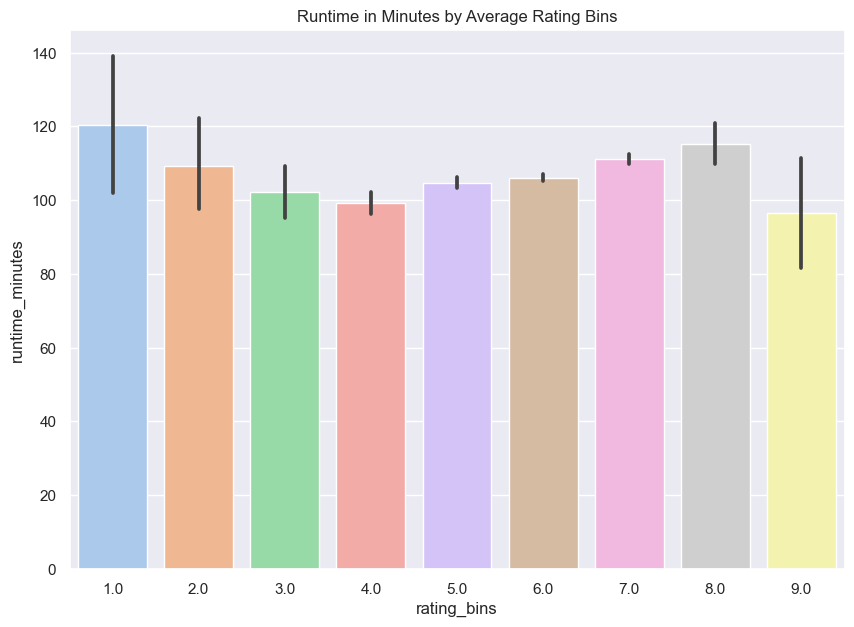

In [47]:
sns.set(rc={"figure.figsize":(10, 7)})
sns.barplot(data = binned_df, x = 'rating_bins', y = 'runtime_minutes', palette = 'pastel').set(title = 'Runtime in Minutes by Average Rating Bins')
#runtime in bin 7: ~110 min
#runtime in bin 8: ~115 min
#runtime in bin 9: ~95 min
#movies with lower runtime in minutes have higher ratings

<Axes: xlabel='studio', ylabel='averagerating'>

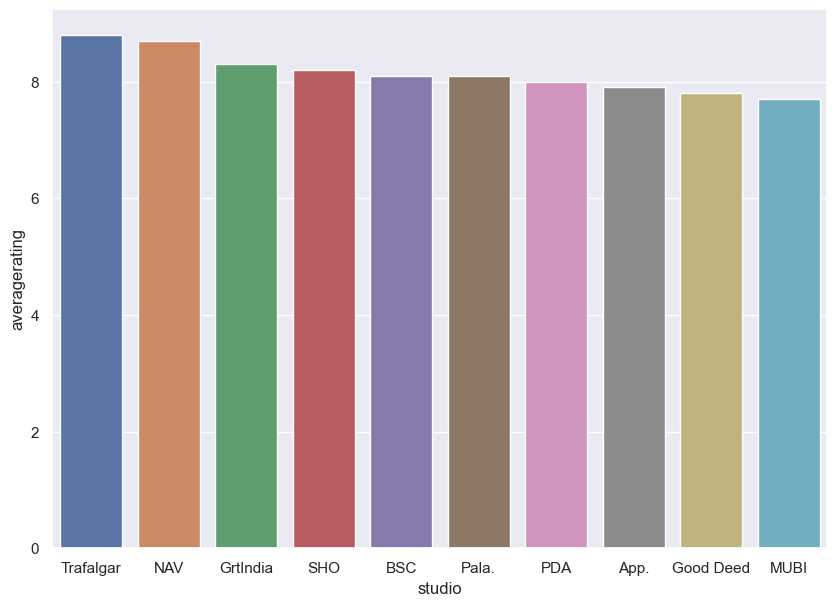

In [48]:
sns.set(rc={"figure.figsize":(10, 7)})
group_means=master_df.groupby(['studio'])['averagerating'].mean().sort_values(ascending=False)
top_20_studios = group_means.head(10)

sns.barplot(x = top_20_studios.index, y = top_20_studios)

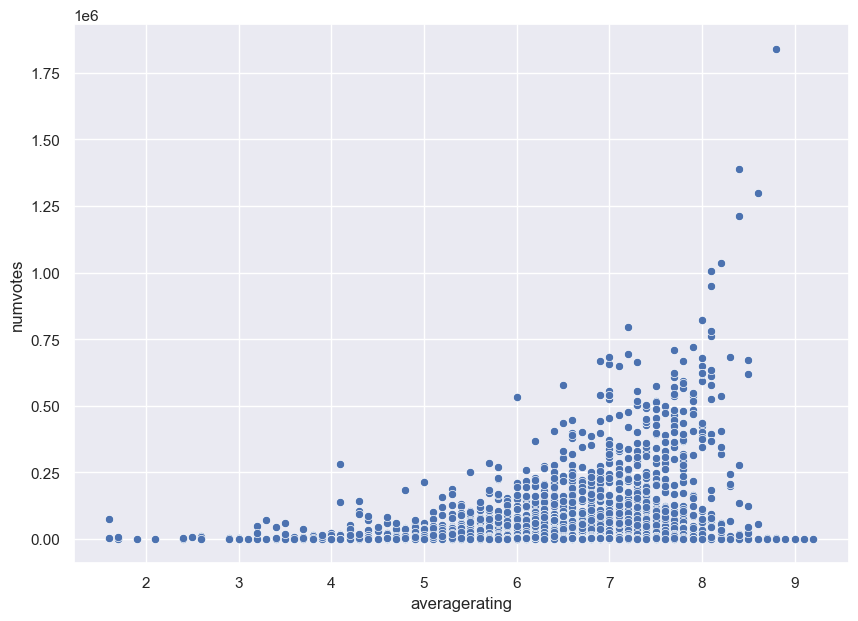

In [49]:
sns.scatterplot(x="averagerating",
y="numvotes",
data=master_df);
# higher ratings are usually more credible

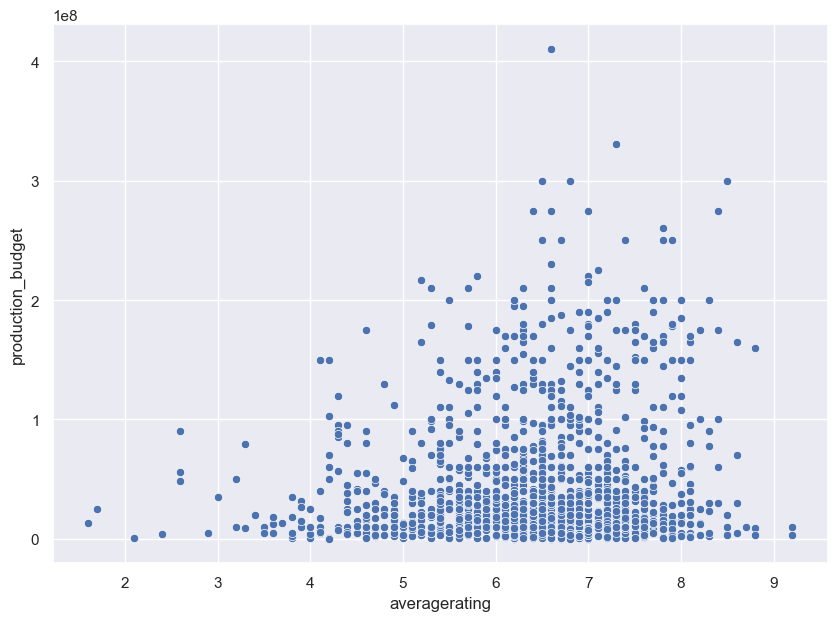

In [50]:
sns.scatterplot(x="averagerating",
y="production_budget",
data=master_df);

C:\Users\usethuraman\AppData\Local\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\usethuraman\AppData\Local\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\usethuraman\AppData\Local\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\usethuraman\AppData\Local\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\usethuraman\AppData\Local\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\usethuraman\AppData\Local\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f

[Text(0.5, 1.0, 'Ratings per production budget')]

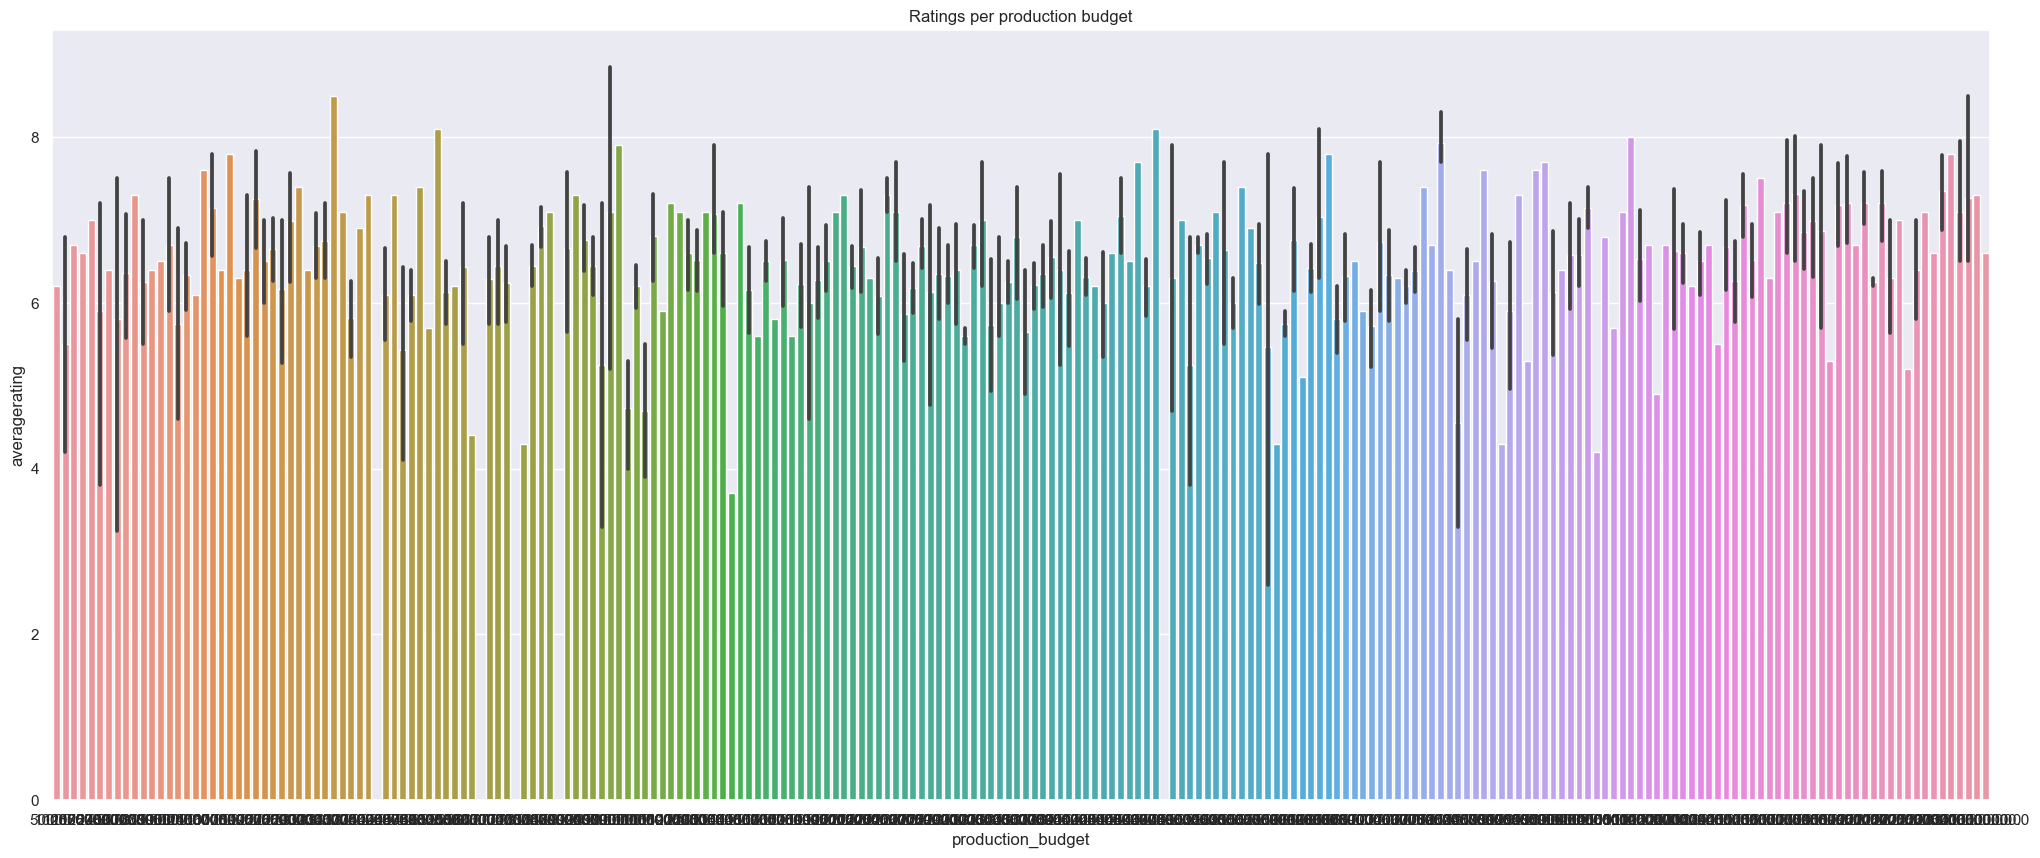

In [51]:
sns.set(rc={"figure.figsize":(25, 10)})
new_df = master_df.dropna(axis=0, subset=['production_budget'])
new_df_top = new_df.sort_values(['production_budget'])
sns.barplot(data = new_df_top, x = 'production_budget', y = 'averagerating').set(title = 'Ratings per production budget')